## import

In [1]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
"""

"\n%matplotlib inline\nplt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots\nplt.rcParams['image.interpolation'] = 'nearest'\nplt.rcParams['image.cmap'] = 'gray'\n"

## 1 - Datasets

In [3]:
mnist = input_data.read_data_sets("datasets/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting datasets/t10k-images-idx3-ubyte.gz
Extracting datasets/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
train_x_orig,train_y_orig,test_x_orig,test_y_orig=mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels

y= 7


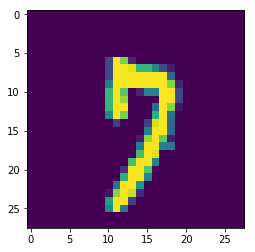

In [5]:
index = 25
plt.imshow(train_x_orig[index].reshape(28,28))
print("y= "+str(int(np.squeeze(np.dot(train_y_orig[index].reshape(1,-1),np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1))))))

In [133]:
train_x=train_x_orig[0:2000].T
train_y=train_y_orig[0:2000].T
test_x=test_x_orig.T
test_y=test_y_orig.T
print("The shape of train_x is ("+ str(train_x.shape[0])+', '+str(train_x.shape[1])+')')
print("The shape of train_y is ("+ str(train_y.shape[0])+', '+str(train_y.shape[1])+')')
print("The shape of test_x is ("+ str(test_x.shape[0])+', '+str(test_x.shape[1])+')')
print("The shape of test_y is ("+ str(test_y.shape[0])+', '+str(test_y.shape[1])+')')

The shape of train_x is (784, 2000)
The shape of train_y is (10, 2000)
The shape of test_x is (784, 10000)
The shape of test_y is (10, 10000)


## 2 - L-layers init paras

In [116]:
def init_paras(X,Y,lims):
    np.random.seed(0)
    paras={}
    L=len(lims)
    
    paras["W1"]=np.random.randn(lims[0],X.shape[0])*0.01
    paras["b1"]=np.zeros((lims[0],1))
    for l in range(1,L):
        paras["W"+str(l+1)]=np.random.randn(lims[l],lims[l-1])*0.01
        paras["b"+str(l+1)]=np.zeros((lims[l],1))
    paras["W"+str(L+1)]=np.random.randn(Y.shape[0],lims[L-1])*0.01
    paras["b"+str(L+1)]=np.zeros((Y.shape[0],1))
    return paras

## 3 - L-layers forward propagate

In [9]:
def relu(Z):
    return np.maximum(0,Z)
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def linear_forward(A_prev,W,b,activation):
    Z=np.dot(W,A_prev)+b
    A=activation(Z)
    cache=(A_prev,W,b,Z)
    return A,cache

In [107]:
def forward_propagate(X,paras):
    L=len(paras)//2
    caches=[]
    A=X
    for l in range(1,L):
        A,cache=linear_forward(A,paras["W"+str(l)],paras["b"+str(l)],relu)
        caches.append(cache)
    AL,cache=linear_forward(A,paras["W"+str(L)],paras["b"+str(L)],sigmoid)
    caches.append(cache)
    return AL,caches

## 4 - Compute cost

In [37]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost=-np.sum(Y*np.log(AL)-(1-Y)*np.log(1-AL))/m
    
    return cost

## 5 - Backward propagate

In [53]:
def linear_back(dA,cache,activation):
    A_prev,W,b,Z=cache
    m=dA.shape[1]
    dZ=activation(dA)
    dW=np.dot(dZ,A_prev.T)/m
    dA_prev=np.dot(W.T,dZ)
    db=np.sum(dZ,axis = 1, keepdims = True)/m
    return dW,dA_prev,db
def sigmoid_back(dA,cache):
    A_prev,W,b,Z=cache
    A=sigmoid(Z)
    dZ=dA*A*(1-A)
    return dZ
def relu_back(dA,cache):
    A_prev,W,b,Z=cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [101]:
def backward_propagate(X,Y,caches,AL):
    grads={}
    L=len(caches)
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    
    grads["dW"+str(L)],grads["dA"+str(L-1)],grads["db"+str(L)]=linear_back(dAL,caches[L-1],sigmoid)
    for l in reversed(range(L-1)):
        grads["dW"+str(l+1)],grads["dA"+str(l)],grads["db"+str(l+1)]=linear_back(grads["dA"+str(l+1)],caches[l],relu)
    return grads

## 6 - Updata paras

In [135]:
def updata_paras(paras,grads,learning_rate=1):
    L=len(paras)//2
    for l in range(1,L-1):
        paras["W"+str(l)]-=learning_rate*grads["dW"+str(l)]
        paras["b"+str(l)]-=learning_rate*grads["db"+str(l)]
    paras["W"+str(L-1)]-=learning_rate*grads["dW"+str(L-1)]
    return paras

In [136]:
lims=[8,5]
costs = []
paras=init_paras(train_x,train_y,lims)
for i in range(0, 2500):
    AL,caches=forward_propagate(train_x,paras)
    cost=compute_cost(AL,train_y)
    grads=backward_propagate(train_x,train_y,caches,AL)
    paras=updata_paras(paras,grads,learning_rate=0.1)
    if i % 100 == 0:
        print ("Cost after iteration %i: %f" %(i, cost))
        costs.append(cost)
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

Cost after iteration 0: -5.545091
Cost after iteration 100: -5.545101
Cost after iteration 200: -5.545104
Cost after iteration 300: -5.545105
Cost after iteration 400: -5.545105
Cost after iteration 500: -5.545105
Cost after iteration 600: -5.545105


KeyboardInterrupt: 

In [95]:
paras["W6"].shape

(10, 8)

In [98]:
grads["dA0"].shape

(784, 55000)

In [49]:
Y*np.log(AL)-(1-Y)*np.log(1-AL)

array([[ 0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718,  0.69314718],
       [ 0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718,  0.69314718],
       [ 0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718,  0.69314718],
       ...,
       [-0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718,  0.69314718],
       [ 0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718, -0.69314718],
       [ 0.69314718,  0.69314718,  0.69314718, ...,  0.69314718,
         0.69314718,  0.69314718]])

In [113]:
paras["W2"].shape

(8, 5)